In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import numpy as np

font = {
    'weight' : 'normal',
    'size' : 22
}
matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=4, linestyle='-.')

# Helper Plotting utility functions.
def set_axes():
    plt.xticks([])
    plt.ylim([-0.1, 1.1])
    plt.yticks([0.2, 0.8], labels=['Low', 'High'], fontsize=28)
    plt.xticks([0.2, 0.8], labels=['Low', 'High'], fontsize=28)

def plot_wrapper(xs, ys, colors, ylabel, yfontsize):
    for i, y in enumerate(ys):
        plt.plot(xs, y, color=colors[i])
    set_axes()

def plot_intrinsic(xs, intrinsics):
    plot_wrapper(xs, intrinsics, ['red'], "Intrinsic Risk", 42)

def plot_treatment(xs, p_treat, colors=['green', 'teal', 'cyan']):
    plot_wrapper(xs, p_treats, colors, "P(Treatment)", 42)

def plot_treated(xs, untreated_risks, treated_risks,
                 untreated_colors=['red'],
                 treated_colors=['blue', 'teal', 'cyan']):
    plot_wrapper(xs, untreated_risks, untreated_colors, "Risk With Treatment", 38)
    plot_wrapper(xs, treated_risks, treated_colors, "Risk With Treatment", 38)
    
def to_prob(x):
    return 1/(1+np.exp(-x))

def get_treated_untreated_risk(inherent_risk, treatment_risk, treatment_benefit):
    treated_risk = inherent_risk + treatment_risk - treatment_benefit
    untreated_risk = inherent_risk 
    return treated_risk, untreated_risk

In [2]:
# Define the risk without treatment.
xs = np.linspace(0, 1, 100)
intrinsic = lambda x,y: x*(xs-y) # slope x, midpoint y
intrinsic_risk = intrinsic(10, 0.5) / 2
inherent_risk_prob = to_prob(intrinsic_risk)

# Define the treatment protocols.
# 3 alternative treatment protocols.
p_treat = lambda x,y,z: x / (1 + np.exp(-y*(xs-z))) # max, slope, midpoint
p_treats = [p_treat(1, 50, 0.25), p_treat(1, 50, 0.5), p_treat(1, 50, 0.8)]

# Define the risk with treatment.
treated_risk = intrinsic_risk-1
my_treated = [to_prob(treated_risk)]

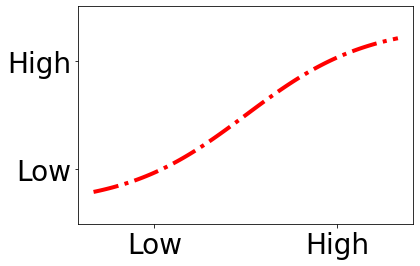

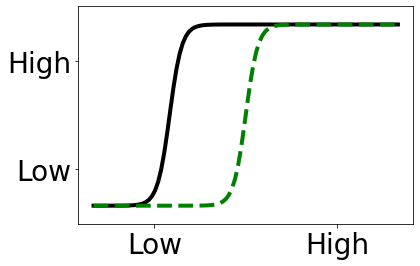

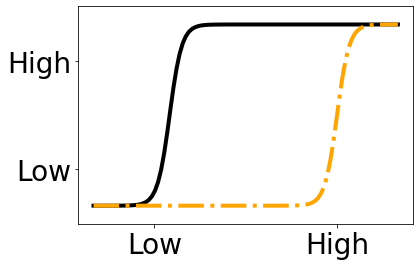

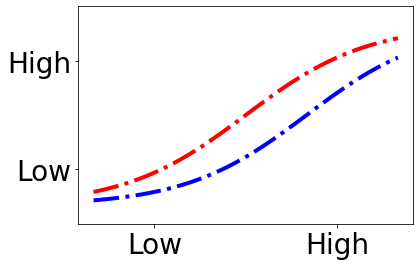

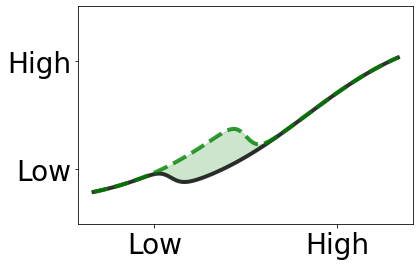

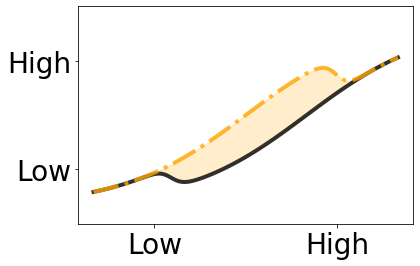

In [3]:
# Plot the results.

colors=['black', 'green', 'orange']
my_intrinsic = [to_prob(intrinsic_risk)]
fig = plt.figure(figsize=(6, 4))
plot_intrinsic(xs, my_intrinsic)

fig = plt.figure(figsize=(6, 4))
plt.plot(xs, p_treats[0], color=colors[0], linestyle='-')
plt.plot(xs, p_treats[1], color=colors[1], linestyle='--')
set_axes()

fig = plt.figure(figsize=(6, 4))
plt.plot(xs, p_treats[0], color=colors[0], linestyle='-')
plt.plot(xs, p_treats[2], color=colors[2], linestyle='-.')
set_axes()

fig = plt.figure(figsize=(6, 4))
plot_treated(xs, my_intrinsic, my_treated)

fig = plt.figure(figsize=(6, 4))
prob_treat, untreated, treated, color = p_treats[0], my_intrinsic[0], my_treated[0], colors[0]
optimal = (1-prob_treat)*untreated + prob_treat*treated
plt.plot(xs, (1-prob_treat)*untreated + prob_treat*treated, color=color, alpha=0.8, linestyle='-')
prob_treat, untreated, treated, color = p_treats[1], my_intrinsic[0], my_treated[0], colors[1]
plt.plot(xs, (1-prob_treat)*untreated + prob_treat*treated, color=color, alpha=0.8, linestyle='--')
t = (1-prob_treat)*untreated + prob_treat*treated

idxs_fill = np.where(t > optimal)
plt.fill_between(xs[idxs_fill], optimal[idxs_fill], t[idxs_fill],  t[idxs_fill], 
                 color=color, alpha=0.2)
set_axes()

fig = plt.figure(figsize=(6, 4))
prob_treat, untreated, treated, color = p_treats[0], my_intrinsic[0], my_treated[0], colors[0]
plt.plot(xs, (1-prob_treat)*untreated + prob_treat*treated, color=color, alpha=0.8, linestyle='-')
optimal = (1-prob_treat)*untreated + prob_treat*treated
prob_treat, untreated, treated, color = p_treats[2], my_intrinsic[0], my_treated[0], colors[2]
plt.plot(xs, (1-prob_treat)*untreated + prob_treat*treated, color=color, alpha=0.8, linestyle='-.')
t = (1-prob_treat)*untreated + prob_treat*treated
idxs_fill = np.where(t > optimal)
plt.fill_between(xs[idxs_fill], optimal[idxs_fill], t[idxs_fill], color=color, alpha=0.2)
set_axes()

plt.show()